In [1]:
!pip install transformers evaluate 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import re
import json
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip "/content/gdrive/MyDrive/DL/hateful_memes.zip"

Streaming output truncated to the last 5000 lines.
  inflating: hateful_memes/img/37640.png  
  inflating: hateful_memes/img/60718.png  
  inflating: hateful_memes/img/82945.png  
  inflating: hateful_memes/img/15387.png  
  inflating: hateful_memes/img/81294.png  
  inflating: hateful_memes/img/75498.png  
  inflating: hateful_memes/img/14072.png  
  inflating: hateful_memes/img/23806.png  
  inflating: hateful_memes/img/71826.png  
  inflating: hateful_memes/img/84307.png  
  inflating: hateful_memes/img/56241.png  
  inflating: hateful_memes/img/10572.png  
  inflating: hateful_memes/img/51248.png  
  inflating: hateful_memes/img/19230.png  
  inflating: hateful_memes/img/05619.png  
  inflating: hateful_memes/img/03268.png  
  inflating: hateful_memes/img/72491.png  
  inflating: hateful_memes/img/35902.png  
  inflating: hateful_memes/img/43658.png  
  inflating: hateful_memes/img/80613.png  
  inflating: hateful_memes/img/96071.png  
  inflating: hateful_memes/img/35916.png  
  i

In [6]:
temp = []
with open('hateful_memes/train.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        temp.append(data)
train = pd.DataFrame(temp)


temp = []
with open('hateful_memes/dev_seen.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        temp.append(data)
val_seen = pd.DataFrame(temp)


temp = []
with open('hateful_memes/dev_unseen.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        temp.append(data)
val_unseen = pd.DataFrame(temp)


temp = []
with open('hateful_memes/test_unseen.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        temp.append(data)
test_unseen = pd.DataFrame(temp)


temp = []
with open('hateful_memes/test_seen.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        temp.append(data)
test_seen = pd.DataFrame(temp)

In [7]:
train.head(5)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [8]:
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

In [9]:
train['text'] = train['text'].apply(clean_text)

val_seen['text'] = val_seen['text'].apply(clean_text)
val_unseen['text'] = val_unseen['text'].apply(clean_text)

test_seen['text'] = test_seen['text'].apply(clean_text)
test_unseen['text'] = test_unseen['text'].apply(clean_text)

In [10]:
train.head(5)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,dont be afraid to love again everyone is not l...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody except for squ...
4,82403,img/82403.png,0,everybody loves chocolate chip cookies even hi...


In [11]:
X_train = train['text'].values
X_val_seen = val_seen['text'].values
X_val_unseen = val_unseen['text'].values
X_test_seen = test_seen['text'].values
X_test_unseen = test_unseen['text'].values


Y_train = train['label'].values
Y_val_seen = val_seen['label'].values
Y_val_unseen = val_unseen['label'].values
Y_test_seen = test_seen['label'].values
Y_test_unseen = test_unseen['label'].values

In [ ]:
X_train.shape

(8500,)

In [ ]:
X_val_seen.shape

(500,)

In [ ]:
Y_val_seen.shape

(500,)

# BERT WITHOUT FINE-TUNING

In [15]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 52.6 MB/s eta 0:00:00


In [16]:
import tensorflow_text as text

In [17]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']


get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.71745336,  0.88082975]], dtype=float32)>

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, validation_data = (X_val_seen, Y_val_seen), validation_batch_size=64, callbacks = [checkpoint_callback] )

Epoch 1/20
266/266 [==============================] - 115s 390ms/step - loss: 0.6479 - accuracy: 0.6406 - val_loss: 0.7422 - val_accuracy: 0.5180
Epoch 2/20
266/266 [==============================] - 105s 393ms/step - loss: 0.6317 - accuracy: 0.6535 - val_loss: 0.7163 - val_accuracy: 0.5280
Epoch 3/20
266/266 [==============================] - 103s 386ms/step - loss: 0.6275 - accuracy: 0.6584 - val_loss: 0.7726 - val_accuracy: 0.5180
Epoch 4/20
266/266 [==============================] - 99s 371ms/step - loss: 0.6204 - accuracy: 0.6668 - val_loss: 0.8642 - val_accuracy: 0.5080
Epoch 5/20
266/266 [==============================] - 98s 368ms/step - loss: 0.6167 - accuracy: 0.6681 - val_loss: 0.7409 - val_accuracy: 0.5260
Epoch 6/20
266/266 [==============================] - 105s 396ms/step - loss: 0.6115 - accuracy: 0.6686 - val_loss: 0.7222 - val_accuracy: 0.5380
Epoch 7/20
266/266 [==============================] - 103s 387ms/step - loss: 0.6079 - accuracy: 0.6735 - val_loss: 0.7563 - v

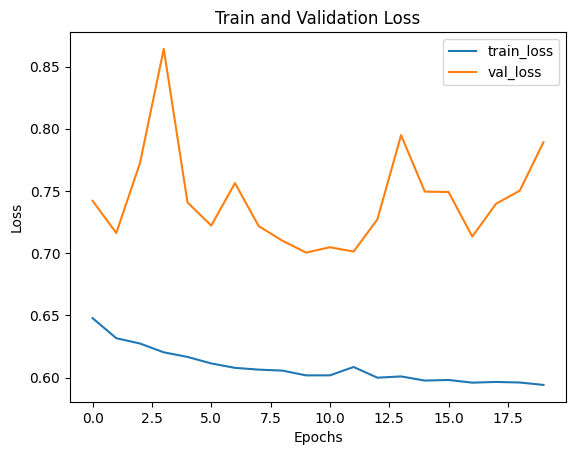

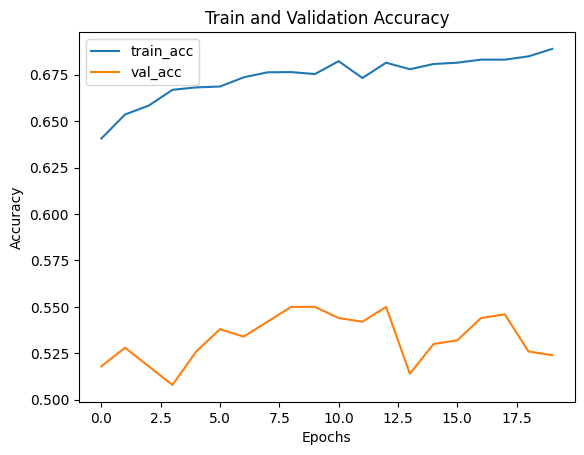

In [ ]:
import matplotlib.pyplot as plt

# Plot train and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('/content/gdrive/MyDrive/DL/A4/bert_model2.h5')

In [18]:
model = tf.keras.models.load_model(
       ('/content/gdrive/MyDrive/DL/A4/bert_model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [26]:
import numpy as np

In [19]:
model.evaluate(X_test_seen, Y_test_seen)

32/32 [==============================] - 15s 315ms/step - loss: 0.7015 - accuracy: 0.5590


[0.7014517784118652, 0.5590000152587891]

In [20]:
Y_test_pred = model.predict(X_test_seen)

32/32 [==============================] - 11s 309ms/step


In [27]:
Y_test_seen_pred = Y_test_pred.reshape((1000,))
Y_test_seen_pred = np.array( Y_test_seen_pred >= 0.5)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_seen, Y_test_seen_pred))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65       510
           1       0.60      0.29      0.40       490

    accuracy                           0.56      1000
   macro avg       0.57      0.55      0.52      1000
weighted avg       0.57      0.56      0.53      1000



In [24]:
Y_test_pred[0 : 10]

array([[0.41947418],
       [0.38965058],
       [0.5462482 ],
       [0.48945883],
       [0.55900717],
       [0.65349275],
       [0.38241452],
       [0.24699005],
       [0.41639555],
       [0.40849054]], dtype=float32)

In [ ]:
model.evaluate(X_test_unseen, Y_test_unseen)

63/63 [==============================] - 21s 335ms/step - loss: 0.6496 - accuracy: 0.6215


[0.6495561599731445, 0.6215000152587891]

# FINE-TUNING BERT

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_seen_enc = tokenizer(test_seen['text'].to_list(), truncation=True, padding=True)
test_unseen_enc = tokenizer(test_unseen['text'].to_list(), truncation=True, padding=True)


In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    Y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    Y_val
))

test_seen = tf.data.Dataset.from_tensor_slices((
    dict(test_seen_enc),
    Y_test_seen

))

test_unseen = tf.data.Dataset.from_tensor_slices((
    dict(test_unseen_enc),
    Y_test_unseen
))


In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import evaluate
accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1).astype(np.float32)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(X_train) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
import tensorflow as tf
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [ ]:
from transformers.keras_callbacks import KerasMetricCallback
metric_callback = KerasMetricCallback(metric_fn = compute_metrics, eval_dataset= val_dataset)

In [ ]:
callbacks = [metric_callback]

In [ ]:
history = model.fit(x=train_dataset, validation_data=val_dataset, epochs=3,  verbose = 1)

Epoch 1/3
8499/8500 [============================>.] - ETA: 0s - loss: 0.5436

TypeError: ignored

In [ ]:
model.save_pretrained('model')

In [ ]:
predications = model.predict(test_unseen)

In [ ]:
predications

In [ ]:
pred_probs = np.exp(predications.logits) / np.sum(np.exp(predications.logits), axis=-1, keepdims=True)
pred_labels = np.argmax(pred_probs, axis=-1)

In [ ]:
pred_labels

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_unseen, pred_labels))

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)
   

In [ ]:

with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)
trainer.train()